# Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import array
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("/content/TempMax_mod.csv")
df = df.set_index('Day')
df.index = pd.to_datetime(df.index)

# Ploting The Data

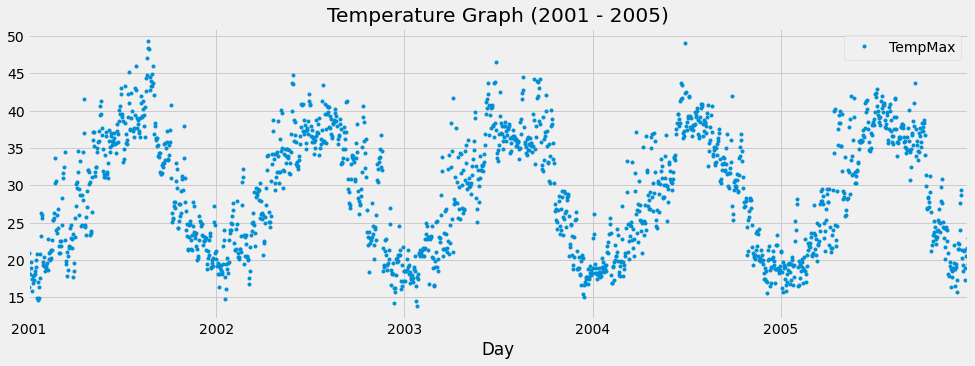

In [ ]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Temperature Graph (2001 - 2005)')
plt.show()

# Dividing data to Train set and Test set

In [ ]:
train = df.loc[df.index < '12/30/2004']
test = df.loc[df.index >= '12/30/2004']

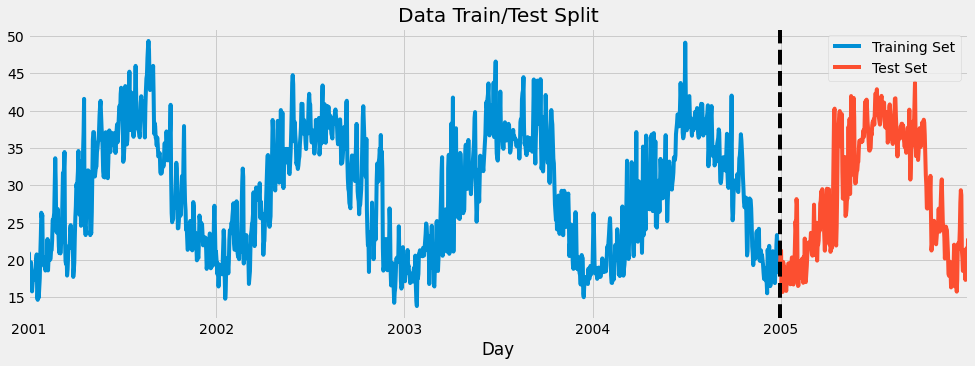

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5)) #Setting Graph size

train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')

ax.axvline('12/30/2004', color='black', ls='--') #splitting data on graph
ax.legend(['Training Set', 'Test Set'])

plt.show()

Checking Train data 

In [ ]:
train

,TempMax
Day,
2001-01-01,18.481531
2001-01-02,20.895227
2001-01-03,16.324121
2001-01-04,18.124323
2001-01-05,18.871942
...,...
2004-12-25,21.933832
2004-12-26,18.868860
2004-12-27,18.695886


# Plotting Data for **1 Week**

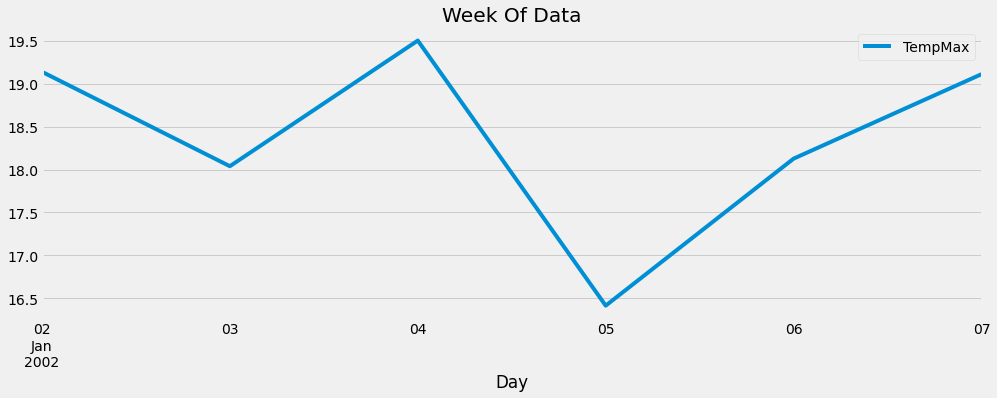

In [ ]:
df.loc[(df.index > '01-01-2002') & (df.index < '01-08-2002')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# Plotting **Month** of Data

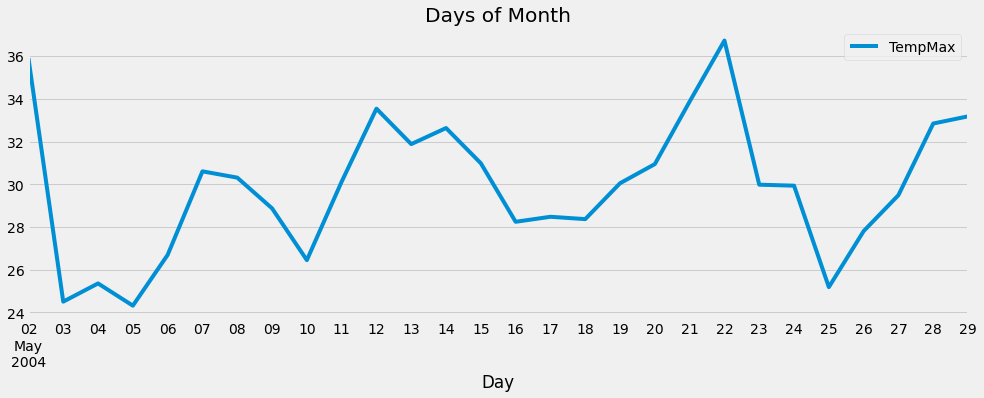

In [ ]:
df.loc[(df.index > '05-01-2004') & (df.index < '05-30-2004')] \
    .plot(figsize=(15, 5), title='Days of Month')
plt.show()

# Create time series features based on time series index.

In [ ]:
def create_features(df):
    
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)  #The new data frame with new features
df

,TempMax,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Day,,,,,,,,
2001-01-01,18.481531,0,1,1,2001,1,1,1
2001-01-02,20.895227,1,1,1,2001,2,2,1
2001-01-03,16.324121,2,1,1,2001,3,3,1
2001-01-04,18.124323,3,1,1,2001,4,4,1
2001-01-05,18.871942,4,1,1,2001,5,5,1
...,...,...,...,...,...,...,...,...
2005-12-26,20.483087,0,4,12,2005,360,26,52
2005-12-27,21.541895,1,4,12,2005,361,27,52
2005-12-28,20.531091,2,4,12,2005,362,28,52


# PLoting Temp. data by **Quarter Year** feature

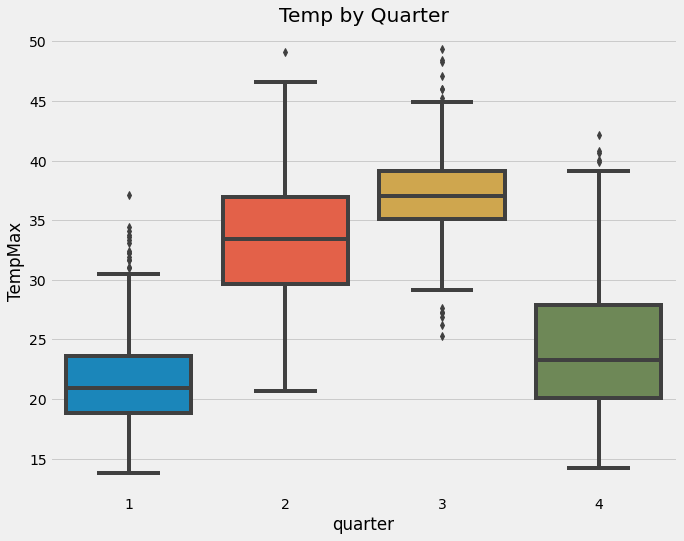

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='TempMax')
ax.set_title('Temp by Quarter')
plt.show()

# Plotting Temp. data by **month** feature

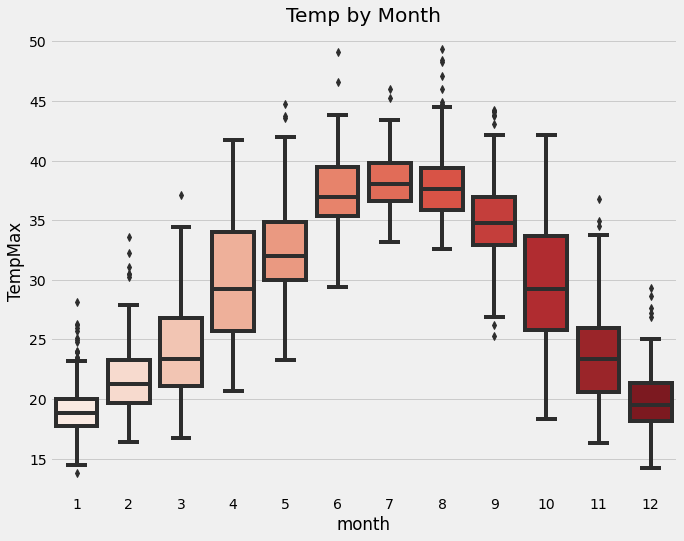

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='TempMax', palette='Reds')
ax.set_title('Temp by Month')
plt.show()

# Training The Model

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear','dayofweek', 'quarter', 'month'] #Giving more features for the model to improve it's training
TARGET = 'TempMax'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[00:18:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:29.4443	validation_1-rmse:29.4062
[100]	validation_0-rmse:11.3326	validation_1-rmse:11.2767
[200]	validation_0-rmse:5.24987	validation_1-rmse:5.1955
[300]	validation_0-rmse:3.68721	validation_1-rmse:3.67356
[400]	validation_0-rmse:3.38824	validation_1-rmse:3.44103
[500]	validation_0-rmse:3.32189	validation_1-rmse:3.43515
[600]	validation_0-rmse:3.29671	validation_1-rmse:3.45115
[700]	validation_0-rmse:3.27686	validation_1-rmse:3.47016
[800]	validation_0-rmse:3.26566	validation_1-rmse:3.48809
[900]	validation_0-rmse:3.25337	validation_1-rmse:3.50737
[999]	validation_0-rmse:3.24193	validation_1-rmse:3.52254


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

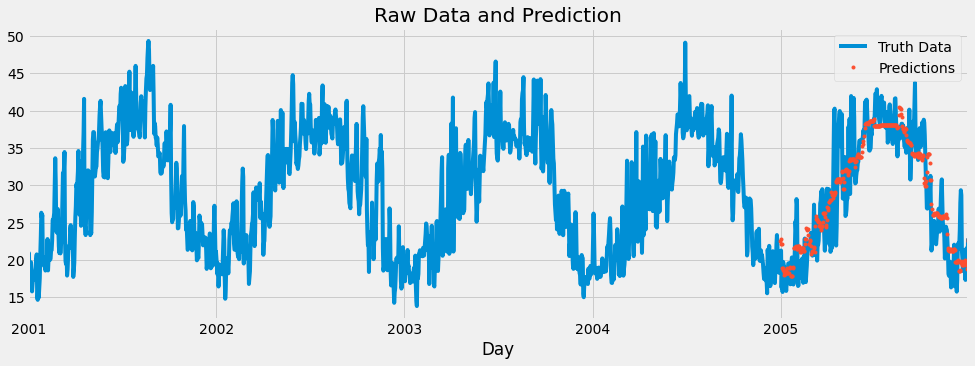

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['TempMax']].plot(figsize=(15, 5))

df['prediction'].plot(ax=ax, style='.')

plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')

plt.show()

Calculating MAE for the Model

In [ ]:
score = mean_absolute_error(test['TempMax'], test['prediction'])
print(score)

2.7612061349021437


# Making Condition for detecting **Heat-waves**

1.   Make the new predicted temperature in new Data fram
2.   Make a condition if there is 3 consecutive that exceed the maximum heat range
3.   Print the heat-wave days






In [ ]:
prediction=test['prediction']

In [ ]:
# size of the list
import array
size = len(prediction)
big_arr = []
heatwave=[]

# Heatwaves in each correspondent month is 3 or more days with temps more than the avg max temp by 2 degrees
heatwave_temps = {}
heatwave_temps["01"] = 23
heatwave_temps["02"] = 24.6
heatwave_temps["03"] = 27.6
heatwave_temps["04"] = 32
heatwave_temps["05"] = 37.3
heatwave_temps["06"] = 38
heatwave_temps["07"] = 40.1
heatwave_temps["08"] = 39
heatwave_temps["09"] = 38.5
heatwave_temps["10"] = 35.1
heatwave_temps["11"] = 30
heatwave_temps["12"] = 25.6

print("Temperature"+"\t\t"+"Day")
print("===============================")
for i in range(size):
    month = test.date[i].strftime("%m")

    # checking the conditions
    if prediction[i] >= heatwave_temps[month] and prediction[i + 1]  >= heatwave_temps[month] and prediction[i + 2] >= heatwave_temps[month]:

        # printing the element as the 
        # conditions are satisfied 

        print(prediction[i], "\t" ,test.date[i].strftime("%d"), '/' , test.date[i].strftime("%m"), '/' , test.date[i].strftime("%Y"))
        a=prediction[i]
        b=test.date[i]
        heatwave.append(b)
        heatwave.append(a)

Temperature		Day
38.174835 	 13 / 06 / 2005
38.174835 	 14 / 06 / 2005
38.289486 	 15 / 06 / 2005
38.338104 	 16 / 06 / 2005
38.338104 	 17 / 06 / 2005
38.293922 	 18 / 06 / 2005
38.288486 	 19 / 06 / 2005
38.55037 	 20 / 06 / 2005
38.55037 	 21 / 06 / 2005
38.575294 	 22 / 06 / 2005
38.575294 	 23 / 06 / 2005
38.575294 	 24 / 06 / 2005
38.562565 	 25 / 06 / 2005
38.57544 	 26 / 06 / 2005
38.56868 	 27 / 06 / 2005
38.56868 	 28 / 06 / 2005
38.690334 	 29 / 06 / 2005
39.408237 	 17 / 08 / 2005
40.445934 	 18 / 08 / 2005
40.42578 	 19 / 08 / 2005
40.305817 	 20 / 08 / 2005
40.24365 	 21 / 08 / 2005
